In [1]:
import pandas as pd
import seaborn as sns

# Load the Titanic dataset
titanic_df = pd.DataFrame(sns.load_dataset('titanic'))

In [2]:
first_five = titanic_df.head(5)
first_five

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
summary = titanic_df.describe()
summary

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df = titanic_df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].copy()
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [7]:
import numpy as np
med = np.median(df['age'][df['age'].notnull()])
df['age'].fillna(med,inplace=True,)

/tmp/ipykernel_36/895116453.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(med,inplace=True,)


In [8]:
df[df['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked


In [9]:
df['embarked'] = df['embarked'].astype('category')
mode = df['embarked'].mode()[0]
print(f'mode: {mode}')
df['embarked'].fillna(mode,inplace=True)

mode: S


/tmp/ipykernel_36/3922801882.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(mode,inplace=True)


In [10]:
df['embarked'].value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [11]:
df = pd.get_dummies(data = df, prefix =['sex','embarked'])

In [12]:
df.head(5)

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [13]:
df.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female',
       'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   age         891 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   sex_female  891 non-null    bool   
 7   sex_male    891 non-null    bool   
 8   embarked_C  891 non-null    bool   
 9   embarked_Q  891 non-null    bool   
 10  embarked_S  891 non-null    bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 46.2 KB


In [15]:
df_y= df['survived']
df_X=df.drop(columns ='survived')


In [16]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      891 non-null    int64  
 1   age         891 non-null    float64
 2   sibsp       891 non-null    int64  
 3   parch       891 non-null    int64  
 4   fare        891 non-null    float64
 5   sex_female  891 non-null    bool   
 6   sex_male    891 non-null    bool   
 7   embarked_C  891 non-null    bool   
 8   embarked_Q  891 non-null    bool   
 9   embarked_S  891 non-null    bool   
dtypes: bool(5), float64(2), int64(3)
memory usage: 39.3 KB


In [17]:
df_y.info

<bound method Series.info of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64>

In [18]:
!pip install xgboost

In [52]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

X = df_X
y = df_y
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state = 40)


In [21]:
md = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

gs = GridSearchCV(
    estimator = md,
    param_grid = param_grid,
    cv=5,
    verbose=1
)

gs.fit(train_X,train_y)
print(gs.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


In [22]:
md = XGBClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.3],
    'max_depth': [3, 5, 7],
}

gs = GridSearchCV(
    estimator = md,
    param_grid = param_grid,
    cv=5,
    verbose=1
)

gs.fit(train_X,train_y)
print(gs.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}


In [23]:
md = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15]
}

gs = GridSearchCV(
    estimator = md,
    param_grid = param_grid,
    cv=5,
    verbose=1
)

gs.fit(train_X,train_y)
print(gs.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'max_depth': 10, 'n_estimators': 100}


In [61]:
md = LogisticRegression()
param_grid = {
    'C': [0.5, 0.8,1.1,2,2.5],
    'max_iter': [10000],
    'l1_ratio':[0,1,0.3,0.5,0.8,1],
    'penalty': ['elasticnet'],
    'solver': ['saga'],
}

gs = GridSearchCV(
    estimator = md,
    param_grid = param_grid,
    cv=5,
    verbose=1
)

gs.fit(train_X,train_y)
print(gs.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'C': 0.8, 'l1_ratio': 0.3, 'max_iter': 10000, 'penalty': 'elasticnet', 'solver': 'saga'}


In [106]:
voting = VotingClassifier(
    estimators=[
        ('gbc', GradientBoostingClassifier()),
        ('rf', RandomForestClassifier()),
        ('xgbc', XGBClassifier()),
        ('lg', LogisticRegression())
    ],
    voting='soft'
)

final_param_grid = {
    'gbc__n_estimators': [50],
    'gbc__learning_rate': [0.05],
    'gbc__max_depth': [5],
    
    'xgbc__n_estimators': [50],
    'xgbc__learning_rate': [0.05],
    'xgbc__max_depth': [5],
    'xgbc__random_state':[42],
    
    'rf__n_estimators': [100],
    'rf__max_depth': [10],

    'lg__C': [0.8],
    'lg__l1_ratio': [0.3],
    'lg__max_iter': [10000],
    'lg__penalty':['elasticnet'],
    'lg__solver':['saga']

    
}


grid_search = GridSearchCV(
    estimator = voting,
    param_grid = final_param_grid,
    cv=5,
    verbose=1
)


In [107]:
grid_search.fit(train_X,train_y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('gbc',
                                                     GradientBoostingClassifier()),
                                                    ('rf',
                                                     RandomForestClassifier()),
                                                    ('xgbc',
                                                     XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   device=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric=None,
                                                                   feature_ty...
             param_grid={'gbc__learning_rate': [0.05], 'gbc__max_depth': [5],
                         'gbc__n_estimators': [50], 'lg__C': [0.8],
                         'lg__l1_ratio': [0.3], 'lg__max_iter': [10000],
                         'lg__penalty': ['elasticnet'], 'lg__solver': ['saga'],
                         'rf__max_depth': [10], 'rf__n_estimators': [100],
                         'xgbc__learning_rate': [0.05], 'xgbc__max_depth': [5],
                         'xgbc__n_estimators': [50],
                         'xgbc__random_state': [42]},
             verbose=1)

In [108]:
print (grid_search.best_params_)

{'gbc__learning_rate': 0.05, 'gbc__max_depth': 5, 'gbc__n_estimators': 50, 'lg__C': 0.8, 'lg__l1_ratio': 0.3, 'lg__max_iter': 10000, 'lg__penalty': 'elasticnet', 'lg__solver': 'saga', 'rf__max_depth': 10, 'rf__n_estimators': 100, 'xgbc__learning_rate': 0.05, 'xgbc__max_depth': 5, 'xgbc__n_estimators': 50, 'xgbc__random_state': 42}


In [109]:

y_pred = grid_search.best_estimator_.predict(test_X)
acc = accuracy_score(test_y,y_pred)
print(f'acc: {acc *100:0.4f}%')

acc: 85.4749%


In [110]:
print(grid_search.best_score_)

0.8356249384418399


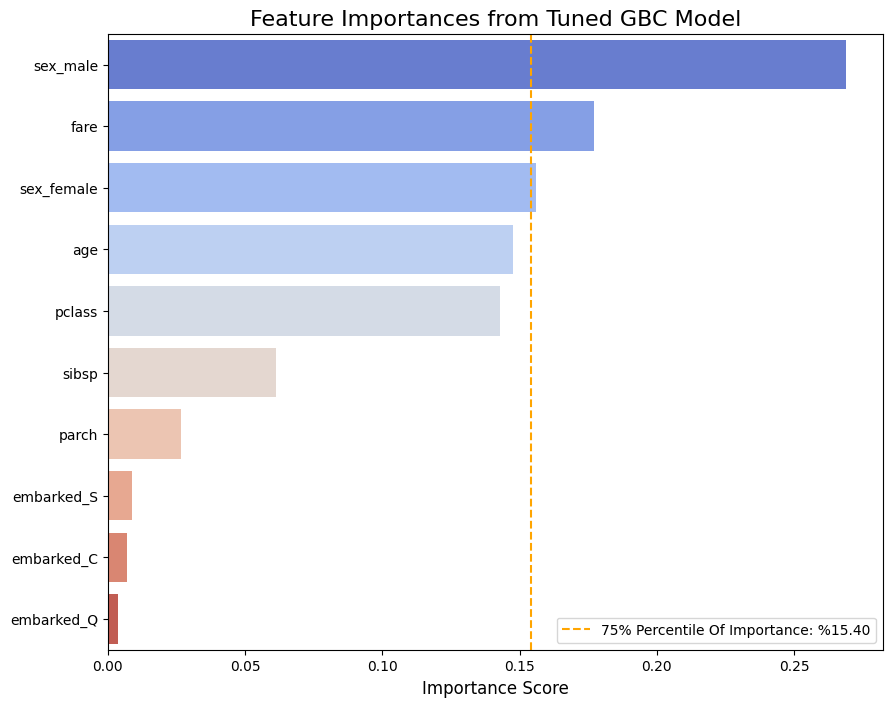

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

voter = grid_search.best_estimator_


xgbc = voter.named_estimators_['xgbc']
gbc = voter.named_estimators_['gbc']
rf = voter.named_estimators_['rf']
lg = voter.named_estimators_['lg']


importances = gbc.feature_importances_
qt = np.quantile(importances,0.75)

feature_names = train_X.columns
importance_df = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=importance_df, y=importance_df.index, palette='coolwarm')
plt.axvline(x=qt, color='orange', linestyle='--',label =f'75% Percentile Of Importance: %{100*qt:0.2f}')
plt.title('Feature Importances from Tuned GBC Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.legend()
plt.show()

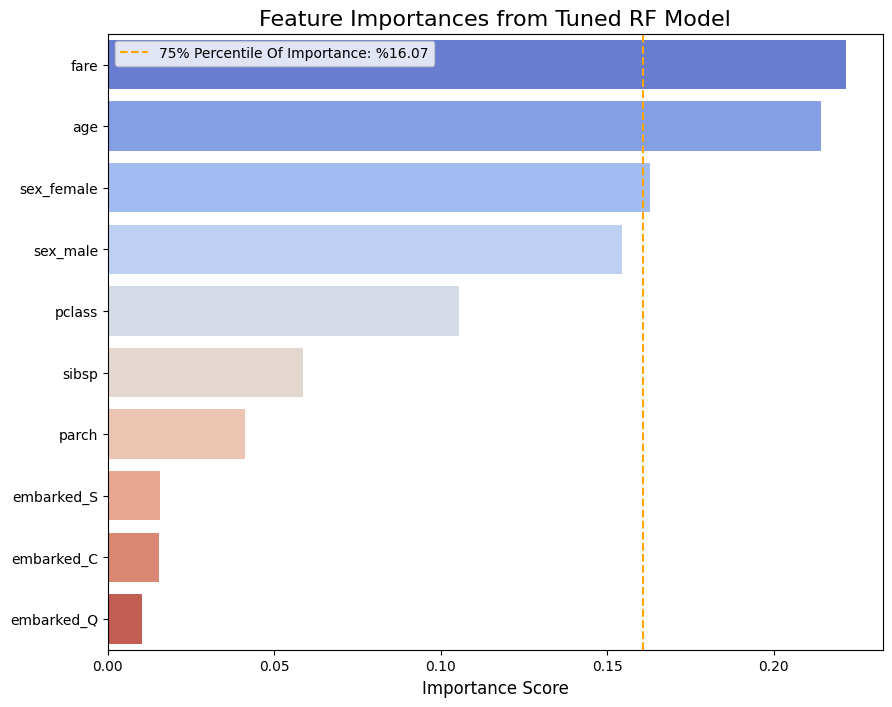

In [112]:

importances = rf.feature_importances_
qt = np.quantile(importances,0.75)

feature_names = train_X.columns
importance_df = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=importance_df, y=importance_df.index, palette='coolwarm')
plt.axvline(x=qt, color='orange', linestyle='--',label =f'75% Percentile Of Importance: %{100*qt:0.2f}')
plt.title('Feature Importances from Tuned RF Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.legend()
plt.show()

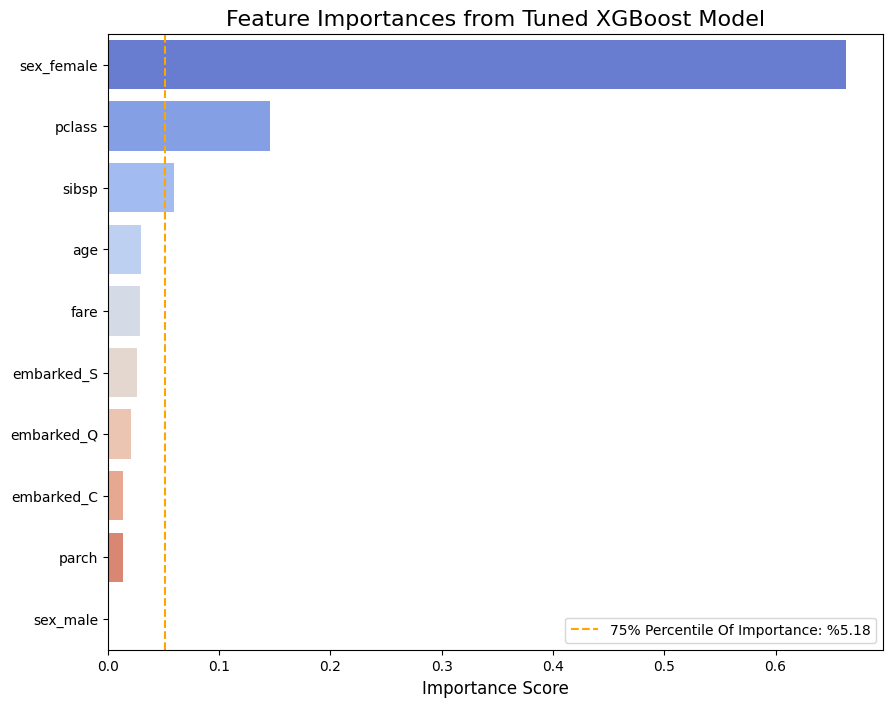

In [113]:
importances = xgbc.feature_importances_
qt = np.quantile(importances,0.75)

feature_names = train_X.columns
importance_df = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=importance_df, y=importance_df.index, palette='coolwarm')
plt.axvline(x=qt, color='orange', linestyle='--',label =f'75% Percentile Of Importance: %{100*qt:0.2f}')
plt.title('Feature Importances from Tuned XGBoost Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.legend()
plt.show()